In [1]:
import numpy as np
import h5py
import lmdb
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm,trange
from PIL import Image,UnidentifiedImageError
from bs4 import BeautifulSoup
import requests
import re
import os
import glob
import pathlib
import time
import datetime
import pprint
from clip.simple_tokenizer import SimpleTokenizer as _Tokenizer
import clip
import random
_tokenizer = _Tokenizer()

## stage0

In [3]:
rgb_handler =  h5py.File('/hy-tmp/stage0/rgb.mat','r')
depth_handler =  h5py.File('/hy-tmp/stage0/depth.mat','r')
inst_handler =  h5py.File('/hy-tmp/stage0/inst.mat','r')
sub_handler =  h5py.File('/hy-tmp/stage0/sub.mat','r')

In [4]:
rgb_data = rgb_handler["rgb"]
depth_data = depth_handler["depth"]
inst_data = inst_handler["instructions"]
sub_data = sub_handler["sub_instructions"]

In [5]:
def show_image(idx=0, num=5):
    for i in range(num):
        rgb = rgb_data[idx+i]
        depth = depth_data[idx+i*100]
        plt.figure()
        plt.imshow(rgb)
        plt.axis(False)
        plt.savefig("stage0_rgb%d.jpg"%(i), bbox_inches = 'tight', pad_inches=0)
        plt.figure()
        plt.imshow(depth,cmap='gray')
        plt.axis(False)
        plt.savefig("stage0_depth%d.jpg"%(i), bbox_inches='tight', pad_inches=0)
def show_language(idx=0):
    res = _tokenizer.decode(inst_data[idx])
    res = res.replace("<|startoftext|>","").replace("<|endoftext|>","").replace("!","")
    print(res)
    print()
    for i in sub_data[idx]:
        res = _tokenizer.decode(i)
        res = res.replace("<|startoftext|>","").replace("<|endoftext|>","").replace("!","")
        print(res)

In [10]:
show_language(idx=250)

her voice is like liquid gold , i 'm sure dear old doug would do anything to see that nothing got in the way of her making them money . 

she turned 
and ran back toward the elevator 
praying it was still there 
she knew that at least two were taken out of service on the weekends , but that left two working on this side of the building 
she jabbed at the down button with her thumb 
and held her breath 
prepared to make a run for the stairs if she had to 
the door slid open and she fell over herself getting in 
she punched the button for the ground floor 
and turned just as the doors started to close , only to find herself staring at marcus 's frozen expression several feet away 
sarah - the doors closed 
cutting him off 


In [11]:
rgb_handler.close()
depth_handler.close()
inst_handler.close()
sub_handler.close()

## stage1

In [12]:
rgb_depth_handler =  h5py.File('/hy-tmp/stage1/rgb_depth_large.mat','r')
inst_sub_handler =  h5py.File('/hy-tmp/stage1/inst_sub_large.mat','r')

In [13]:
rgb_data = rgb_depth_handler["rgb"]
depth_data = rgb_depth_handler["depth"]
inst_data = inst_sub_handler["instructions"]
sub_data = inst_sub_handler["sub_instructions"]

In [14]:
def show_image(idx=0, num=3):
    for i in range(num):
        k = random.randint(i,200)
        rgb = rgb_data[idx+k]
        depth = depth_data[idx+k]
        plt.figure()
        plt.imshow(rgb)
        plt.axis(False)
        plt.savefig("stage1_rgb%d.jpg"%(i), bbox_inches = 'tight', pad_inches=0)
        plt.figure()
        plt.imshow(depth,cmap='gray',)
        plt.axis(False)
        plt.savefig("stage1_depth%d.jpg"%(i), bbox_inches='tight', pad_inches=0)
def show_language(idx=0):
    res = _tokenizer.decode(inst_data[idx])
    res = res.replace("<|startoftext|>","").replace("<|endoftext|>","").replace("!","")
    print(res)
    print()
    for i in sub_data[idx]:
        res = _tokenizer.decode(i)
        res = res.replace("<|startoftext|>","").replace("<|endoftext|>","").replace("!","")
        print(res)

In [34]:
show_language(idx=200)

with the tall gate on your left and facing the intersection , go straight through this intersection . there will be a blue bike rental rack on your left . go straight through the next two intersections . there will be two olive mailboxes behind a parked gray car on your right . 

with the tall gate on your left 
and facing the intersection 
go straight through this intersection 
there will be a blue bike rental rack on your left 
go straight through the next two intersections 
there will be two olive mailboxes behind a parked gray car on your right 








In [35]:
rgb_depth_handler.close()
inst_sub_handler.close()

## stage2

In [36]:
data_handler =  h5py.File('/hy-tmp/stage2/data.mat','r')

In [37]:
rgb_data = data_handler["rgb"]
depth_data = data_handler["depth"]
inst_data = data_handler["instructions"]
sub_data = data_handler["sub_instructions"]

In [44]:
def show_data(idx=0, num=3):
    for i in range(num):
        rgb = rgb_data[idx+i*4]
        depth = depth_data[idx+i*4]
        plt.figure()
        plt.imshow(rgb)
        plt.axis(False)
        plt.savefig("stage2_rgb%d.jpg"%(i), bbox_inches = 'tight', pad_inches=0)
        plt.figure()
        plt.imshow(depth,cmap='gray',)
        plt.axis(False)
        plt.savefig("stage2_depth%d.jpg"%(i), bbox_inches = 'tight', pad_inches=0)
    res = _tokenizer.decode(inst_data[idx])
    res = res.replace("<|startoftext|>","").replace("<|endoftext|>","").replace("!","")
    print(res)
    print()
    for i in sub_data[idx]:
        res = _tokenizer.decode(i)
        res = res.replace("<|startoftext|>","").replace("<|endoftext|>","").replace("!","")
        print(res)

walk forward , turn right and pass the mirror on the left . enter the hallway and walk diagonally to the right to the open door . walk into the room containing two bed - like structures . stop and wait in the doorway . 

walk forward 
turn right 
and pass the mirror on the left 
enter the hallway 
and walk diagonally to the right to the open door 
walk into the room containing two bed - like structures 
stop 
and wait in the doorway 






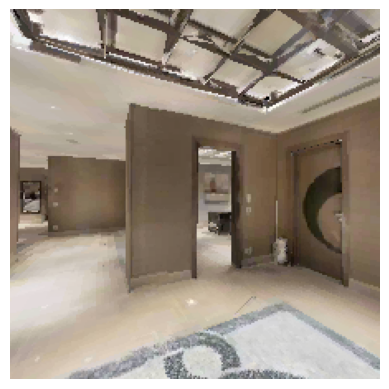

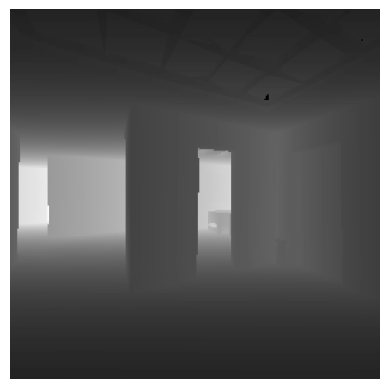

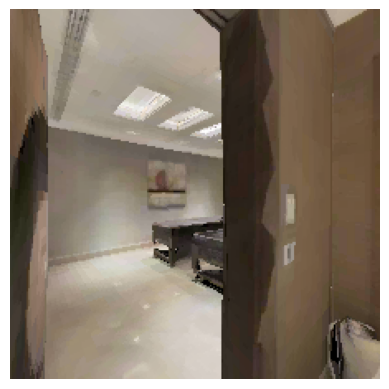

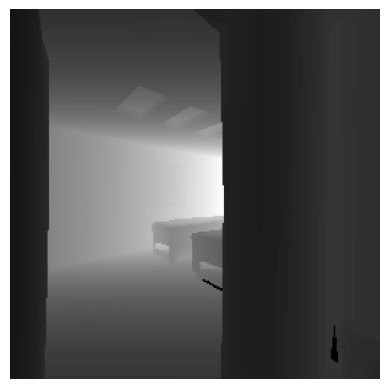

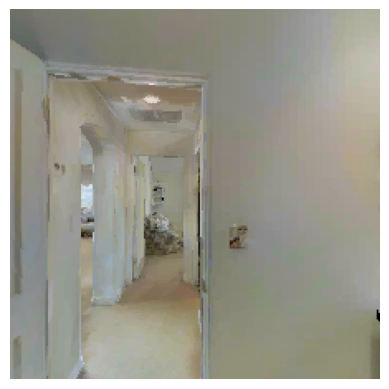

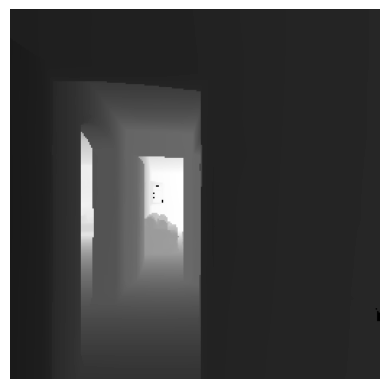

In [45]:
show_data(40000)